### **Project Title: Laptop Price Prediction for SmartTech Co.**

### Objectives:
### Accurate Pricing: Develop a model that can accurately predict laptop prices based on various features, helping our clients stay competitive in the market.

### Market Positioning: Understand how different features contribute to pricing, enabling SmartTech Co. to strategically position its laptops in the market.

### Brand Influence: Assess the impact of brand reputation on pricing, providing insights into brand perception and market demand.

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("laptop.csv")
data.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


### Data Exploration and Understanding:

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


As we can ee we need to convert certain colums to numerical.







Remaining are all Categorical columns.

In [99]:
data.shape

(1303, 13)

In [100]:
data.Company.value_counts()

Lenovo       290
Dell         287
HP           266
Asus         156
Acer         103
MSI           53
Toshiba       47
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
LG             3
Huawei         2
Fujitsu        2
Name: Company, dtype: int64

Lenovo and dell are top most .

In [101]:
data['ScreenResolution'].value_counts()

Full HD 1920x1080                                495
1366x768                                         274
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         52
Full HD / Touchscreen 1920x1080                   45
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  14
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160                9
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
Touchscreen 2560x1440                              6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

Full HD 1920*1080P has the highest laptops.

In [102]:
data.Memory.value_counts()

256GB SSD                        401
1TB HDD                          217
500GB HDD                        130
512GB SSD                        116
128GB SSD +  1TB HDD              92
128GB SSD                         74
256GB SSD +  1TB HDD              71
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                14
512GB SSD +  1TB HDD              14
1TB SSD                           13
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          4
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
128GB SSD +  2TB HDD               2
256GB SSD +  500GB HDD             2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [103]:
data.Gpu.value_counts()

Intel HD Graphics 620      271
Intel HD Graphics 520      181
Intel UHD Graphics 620      66
Nvidia GeForce GTX 1050     64
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

### **Visualization**

Plot for price Analysis

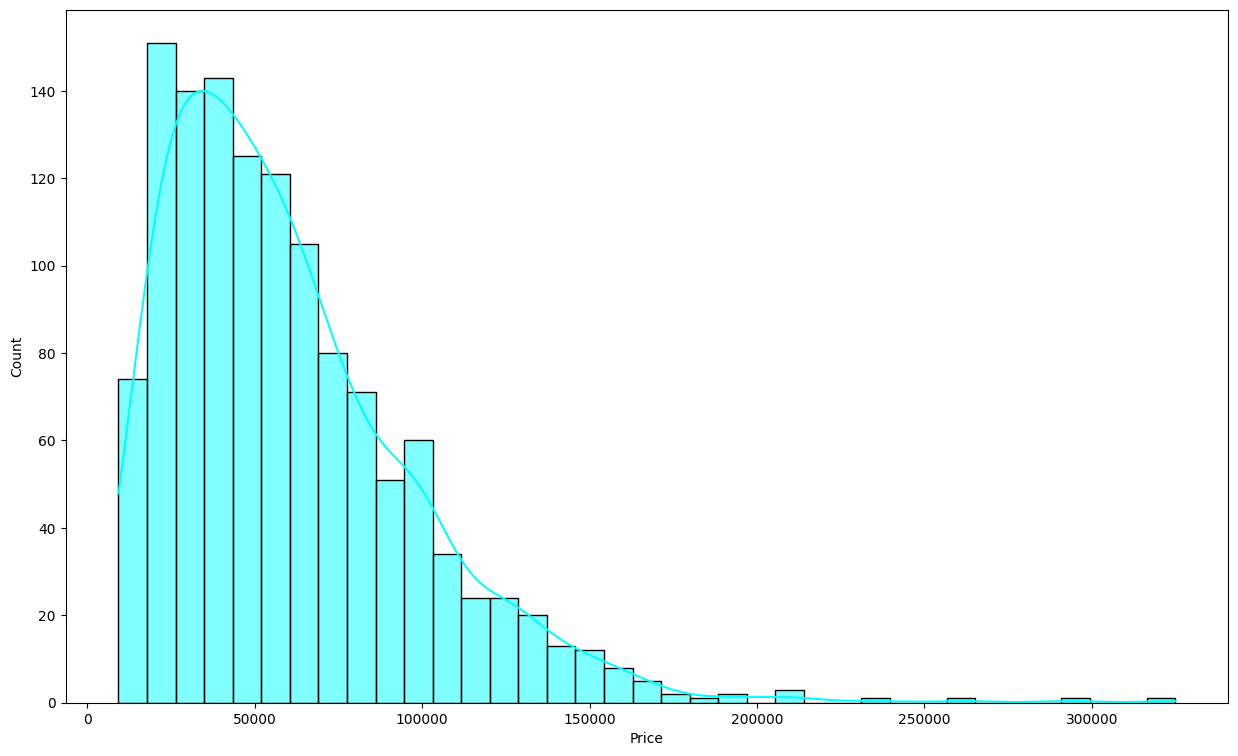

In [104]:
plt.figure(figsize=(15,9))
sns.histplot(data=data,x='Price',kde=True,color='cyan')
plt.show()

Right skewed Distribution.

Upto 60000 rupees , most laptop's are available.

<Axes: ylabel='Price'>

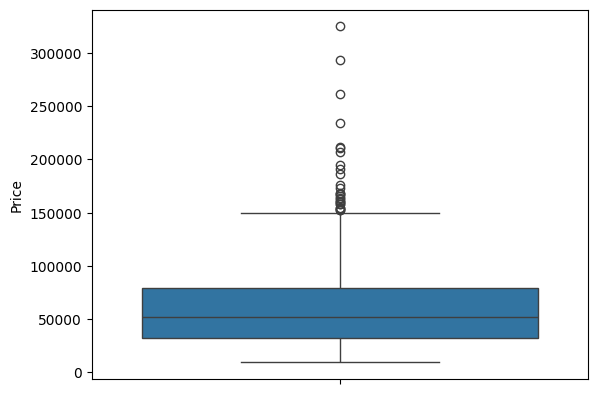

In [105]:
sns.boxplot(data=data, y='Price')

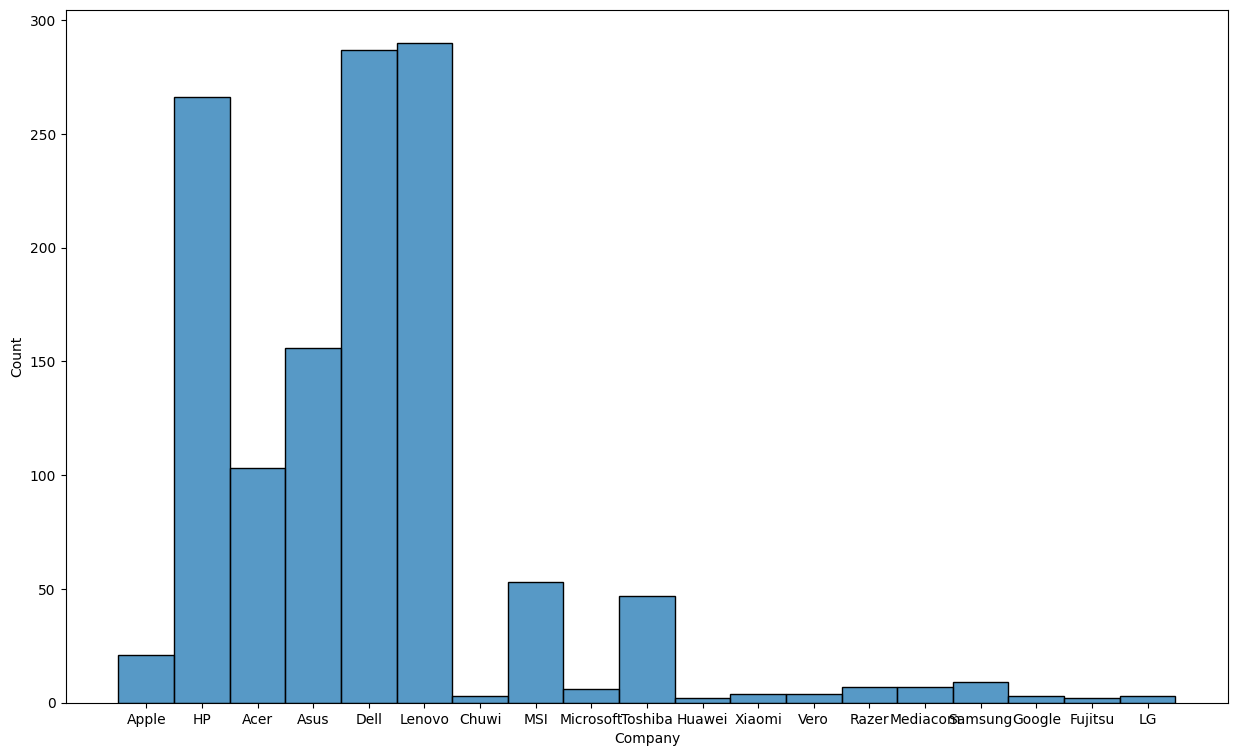

In [106]:
plt.figure(figsize=(15,9))
sns.histplot(data=data,x='Company')
plt.show()

Lenovo , Dell and Hp has highest number of laptops

Average price for each company

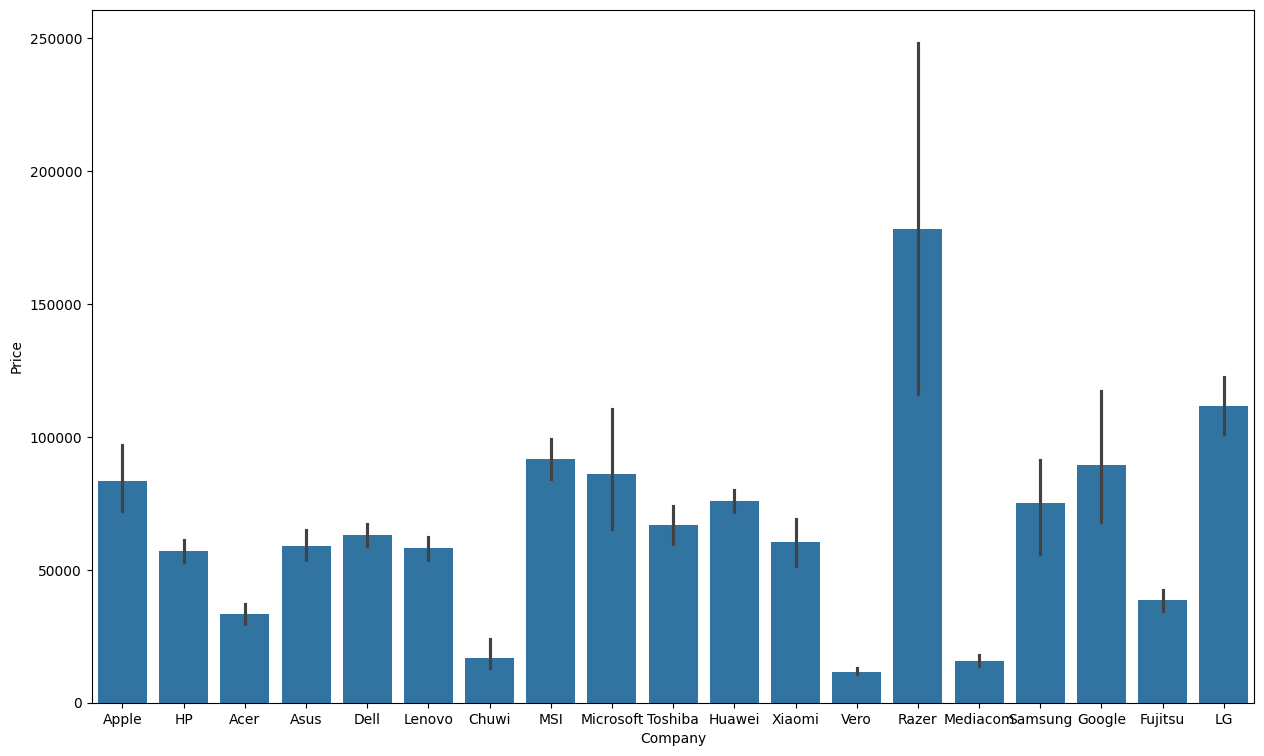

In [107]:
plt.figure(figsize=(15,9))
sns.barplot(data=data,x='Company',y='Price')
plt.show()

# Countplot for various TECHNICAL SPECIFICATIONS

In [108]:
data.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


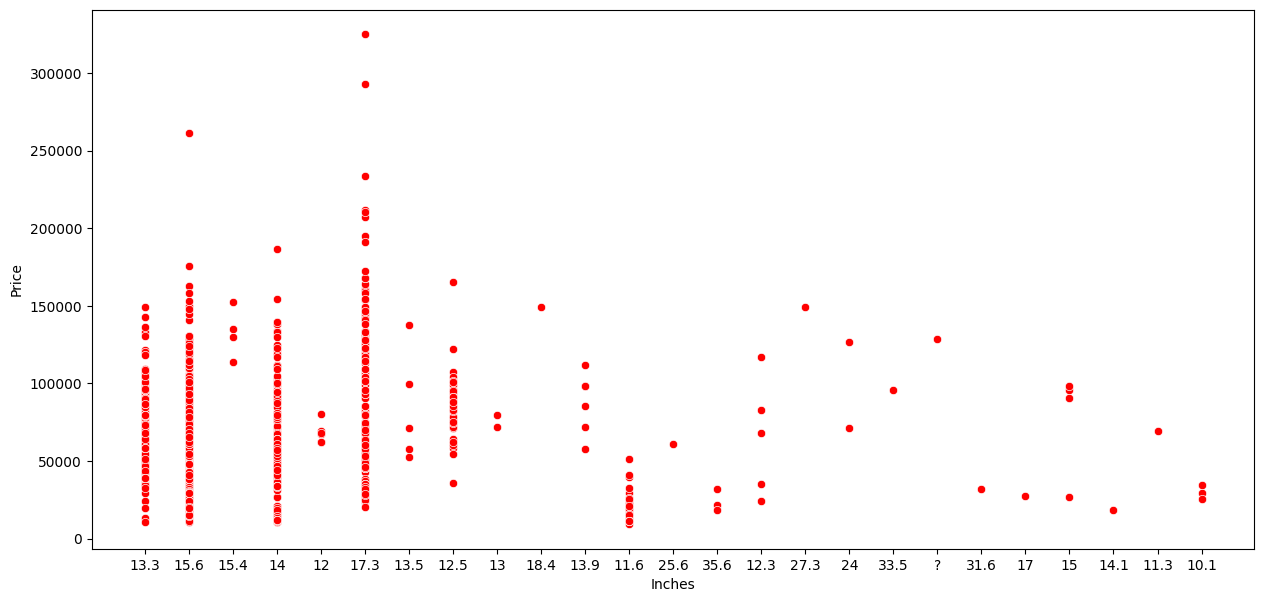

In [109]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=data['Inches'],y=data['Price'],color='red')
plt.show()

Highest price is for 17.3 inch laptop.

Lowest pricr is for 10.1 inch laptop.

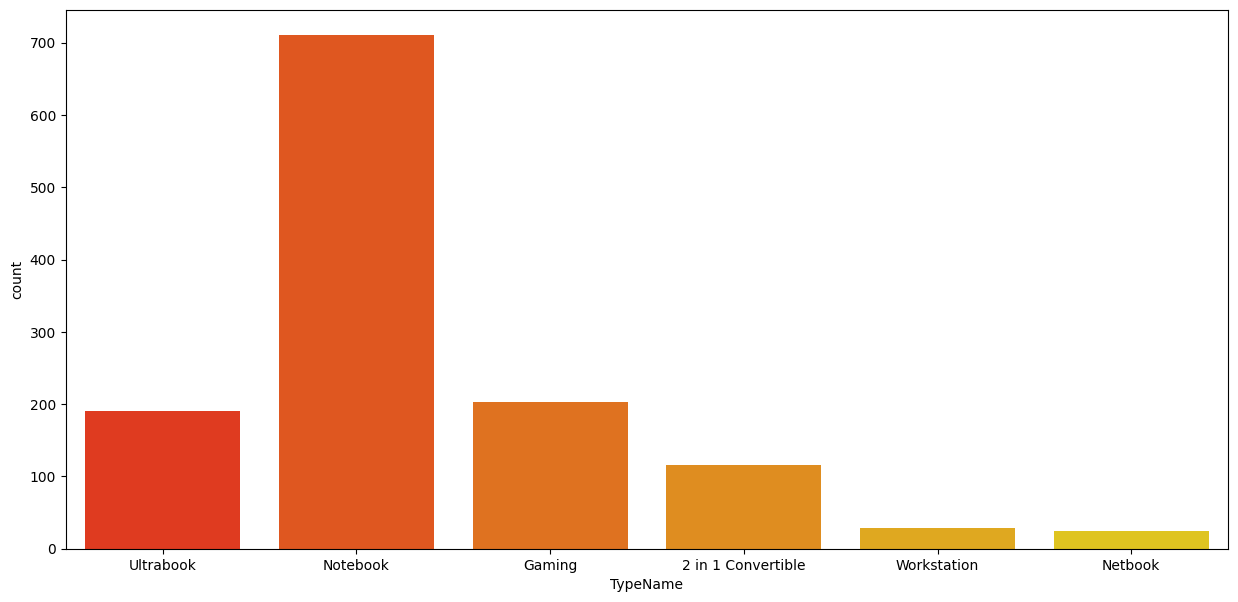

In [110]:
plt.figure(figsize=(15,7))
sns.countplot(data=data,x='TypeName',palette='autumn')
plt.show()

We can see lot of notebooks are brought.

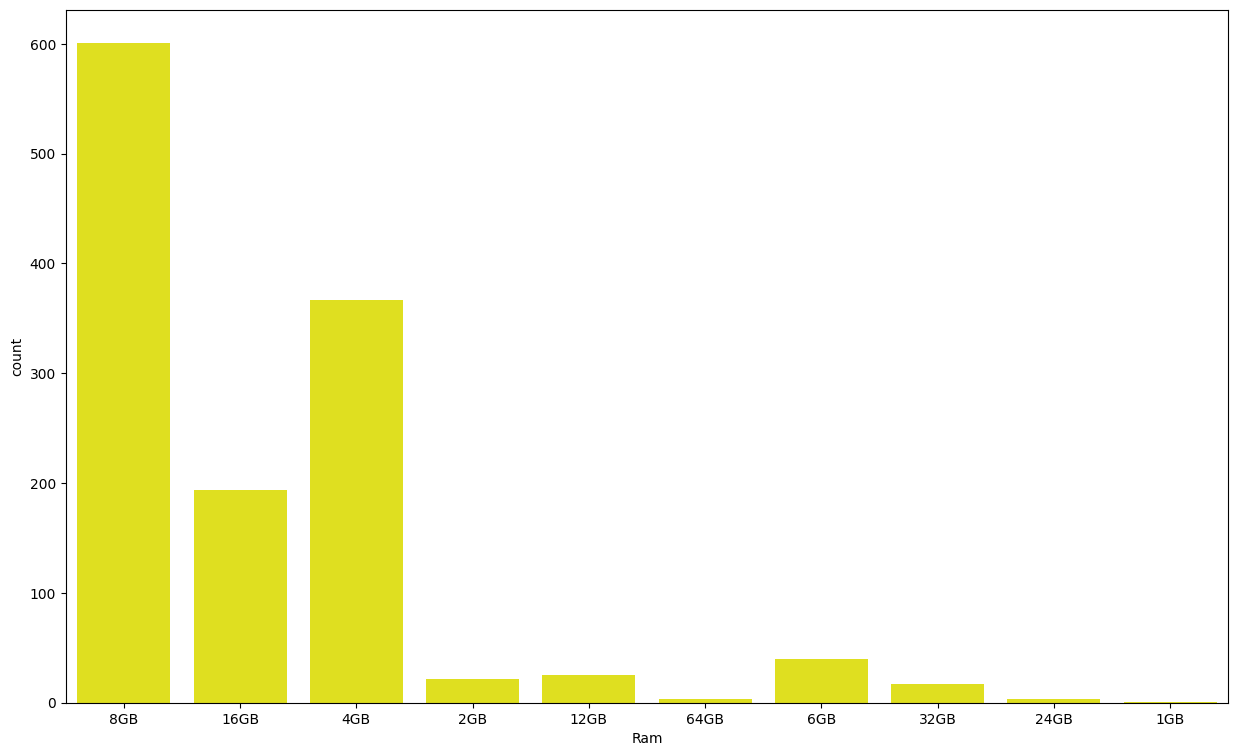

In [111]:
plt.figure(figsize=(15,9))
sns.countplot(data=data,x='Ram',color='yellow')
plt.show()

8gb ram seems to be popular. Both extremes like 1gb and 24-32 gb ram are least popular.

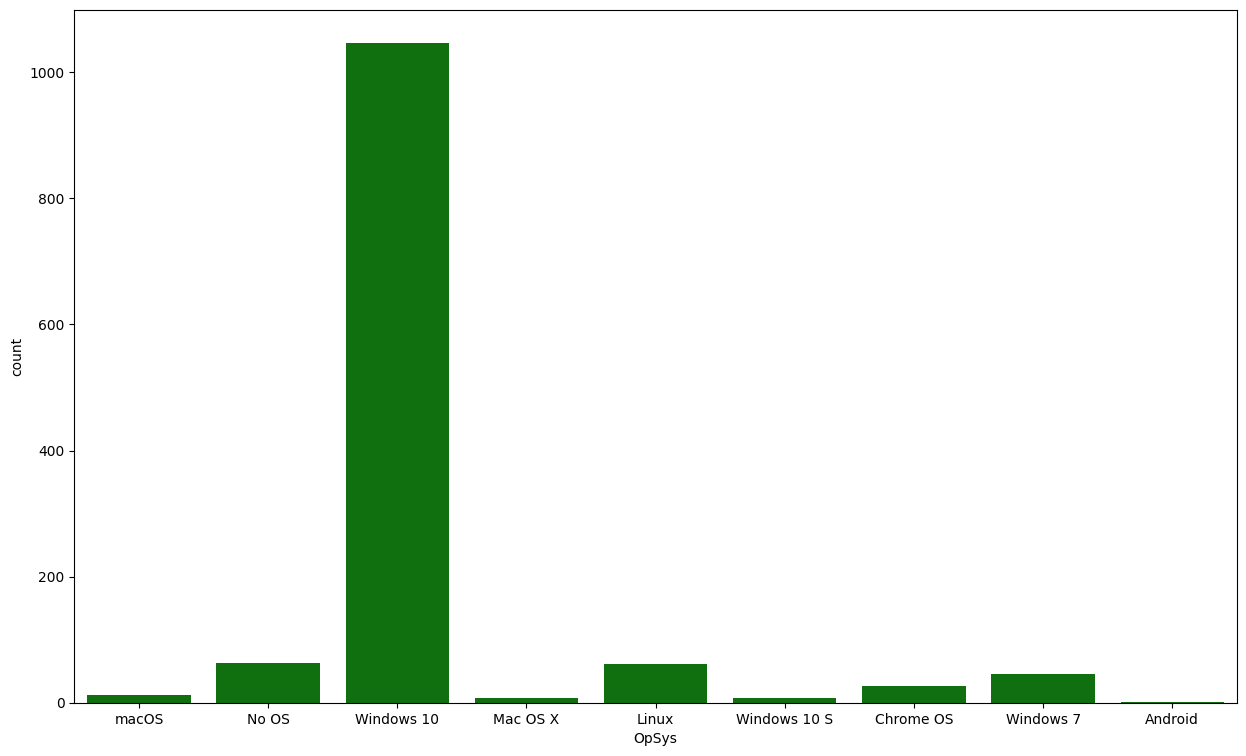

In [112]:
plt.figure(figsize=(15,9))
sns.countplot(data=data,x='OpSys',color='green')
plt.show()

Windows is the most popular

### Price based on type of laptop

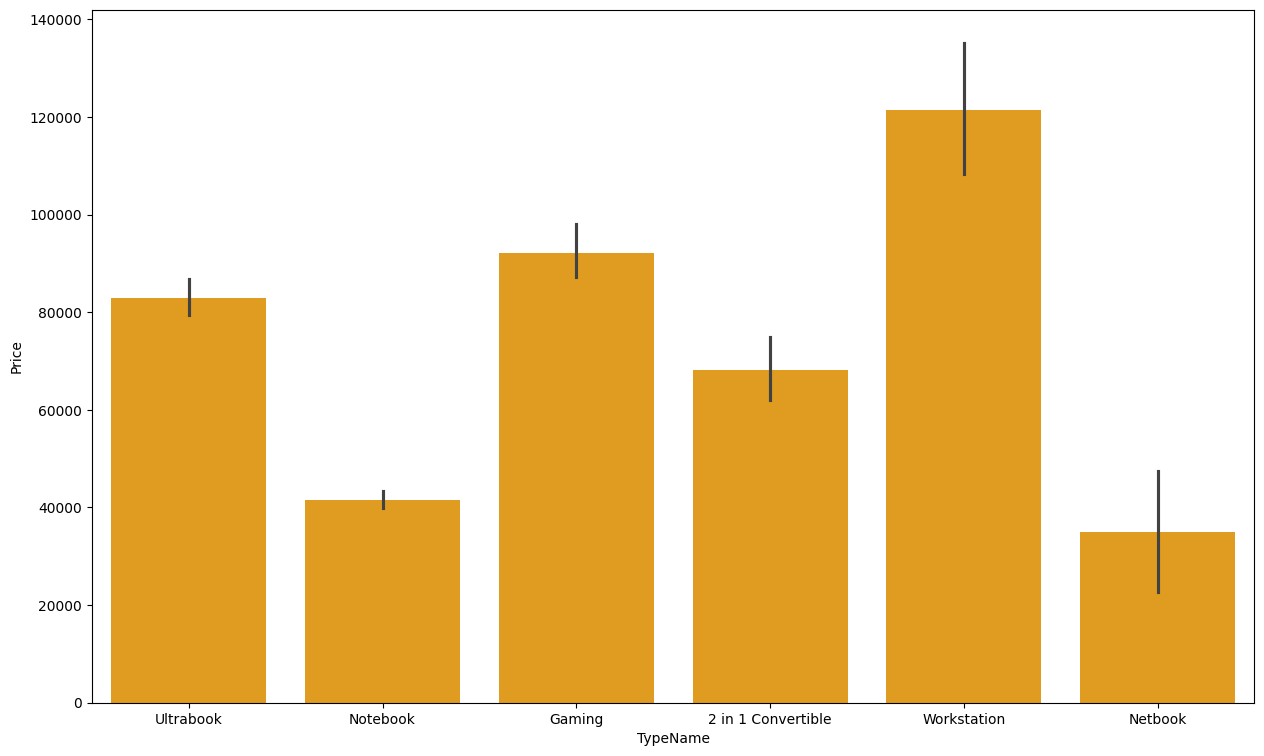

In [113]:
plt.figure(figsize=(15,9))
sns.barplot(data=data,x='TypeName',y='Price',color='orange')
plt.show()

Workstation is the most expensive.

### **Data Preprocessing:**

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


### **There are certain rows with value '?' in columns Memory , inches and weight.  Lets see how many rows are there**

In [115]:
data.loc[data['Memory'] == '?']



,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
770,770,770.0,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,?,AMD Radeon R7 M445,Windows 10,2.3kg,62938.0656


In [116]:

data.loc[data['Weight'] == '?']


,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
208,208,208.0,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,?,77202.72


In [117]:
data.loc[data['Inches'] == '?']



,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
476,476,476.0,Dell,Workstation,?,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78kg,128298.24


In [118]:
#Removing ? from rows of those respective Columns
data['Memory'].replace('?', np.nan, inplace=True)
data['Inches'].replace('?', np.nan, inplace=True)
data['Weight'].replace('?', np.nan, inplace=True)

## Lets see the Null Percentage of our DataFrame





In [119]:
data.isnull().mean()*100

Unnamed: 0.1        0.000000
Unnamed: 0          2.302379
Company             2.302379
TypeName            2.302379
Inches              2.379125
ScreenResolution    2.302379
Cpu                 2.302379
Ram                 2.302379
Memory              2.379125
Gpu                 2.302379
OpSys               2.302379
Weight              2.379125
Price               2.302379
dtype: float64

# Dropping unrelated columns

In [120]:
data.drop(columns=['Unnamed: 0.1','Unnamed: 0'],inplace=True)

In [121]:
data.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

Using for loop to fill in missing data using Mode as these columns are Categorical


In [122]:
columns =['Company','TypeName','ScreenResolution','Cpu','Memory','Gpu','OpSys','Ram','Weight','Inches']
for i in columns:
  data[i]=data[i].fillna(data[i].mode()[0])


Using median for price due to presence of Outliers.

In [123]:
data['Price']=data['Price'].fillna(data['Price'].median())

In [124]:
data.isnull().mean()*100

Company             0.0
TypeName            0.0
Inches              0.0
ScreenResolution    0.0
Cpu                 0.0
Ram                 0.0
Memory              0.0
Gpu                 0.0
OpSys               0.0
Weight              0.0
Price               0.0
dtype: float64

In [125]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


### **Feature Engineering:**

Removing certain strings from columns so that to make them Numerical.

In [126]:
data['Ram'] = data['Ram'].str.replace("GB", "")
data['Weight'] = data['Weight'].str.replace("kg", "")
data['Ram'] = data['Ram'].astype('int32')
#converting from object to float using astype
data['Weight'] = data['Weight'].astype('float32')
data['Inches']= data['Inches'].astype('float32')

<Axes: ylabel='Ram'>

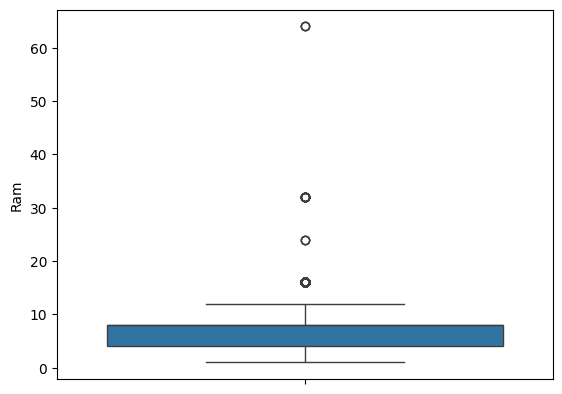

In [127]:
sns.boxplot(data=data,y='Ram')

<Axes: ylabel='Inches'>

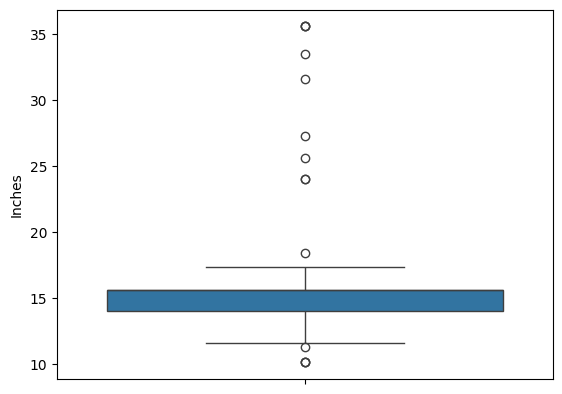

In [128]:
sns.boxplot(data=data,y='Inches')

<Axes: ylabel='Weight'>

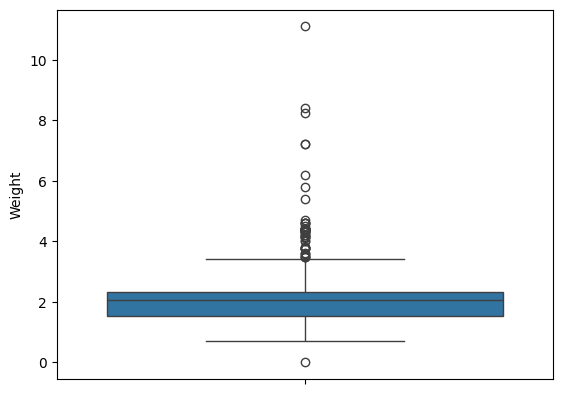

In [129]:
sns.boxplot(data=data,y='Weight')

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float32
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(2), float64(1), int32(1), object(7)
memory usage: 96.8+ KB


## **Now let us seggreagate Touchscreen laptops , which are a unique specification.**

## **And IPS laptops , which are most popular.**

In [131]:
data['Touchscreen']= data['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)




<Axes: xlabel='Touchscreen', ylabel='Price'>

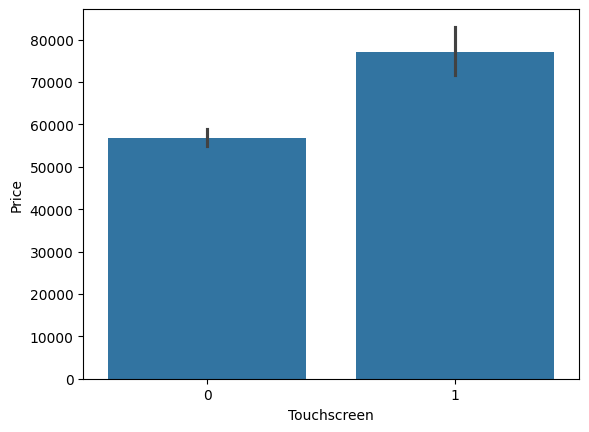

In [132]:
sns.barplot(x=data['Touchscreen'],y=data['Price'])


Touchscreen laptops are high priced.

## Now Lets take IPS Display

<Axes: xlabel='Ips', ylabel='Price'>

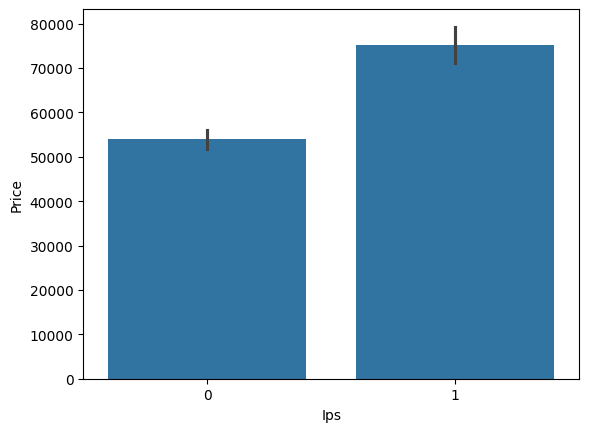

In [133]:
data['Ips'] = data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
sns.barplot(x=data['Ips'],y=data['Price'])

Similarly IPS laptops are expensive.

In [134]:
print(data.shape)

(1303, 13)


In [135]:
data.ScreenResolution.value_counts()

Full HD 1920x1080                                525
1366x768                                         274
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         52
Full HD / Touchscreen 1920x1080                   45
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  14
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160                9
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
Touchscreen 2560x1440                              6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

As you can see we can convert Screen resolution column to a numerical column by extracting the resolution and converting to PPI. Since we already Extracted IPS information we dont require remaining strings.

In [136]:
split = data['ScreenResolution'].str.split('x',n=1,expand=True)
data['x-res']=split[0]
data['y-res']=split[1]

In [137]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,x-res,y-res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


Extracting just numerical info by applying str.findall.

In [138]:
# data['x-res']= data['x-res'].str.extract('(\d+\.?\d*)')
data['x-res'] = data['x-res'].str.findall(r'(\d+.?\d+)').apply(lambda x:x[0])





In [139]:
data['x-res']

0       2560
1       1440
2       1920
3       2880
4       2560
        ... 
1298    1920
1299    3200
1300    1366
1301    1366
1302    1366
Name: x-res, Length: 1303, dtype: object

In [140]:
data['x-res'] = data['x-res'].astype('int')
data['y-res'] = data['y-res'].astype('int')

In [141]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,x-res,y-res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float32
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  x-res             1303 non-null   int64  
 14  y-res             1303 non-null   int64  
dtypes: float32(2), float64(1), int32(1), int64(4), object(7)
memory usage: 137.6+ KB


In [143]:
data.corr()['Price']

Inches         0.043761
Ram            0.685649
Weight         0.175103
Price          1.000000
Touchscreen    0.190509
Ips            0.256578
x-res          0.557008
y-res          0.553624
Name: Price, dtype: float64

AS we can see inches dont have a strong relationship with Price. So we can combine x res , yres and Inches and getting a new column named PPI

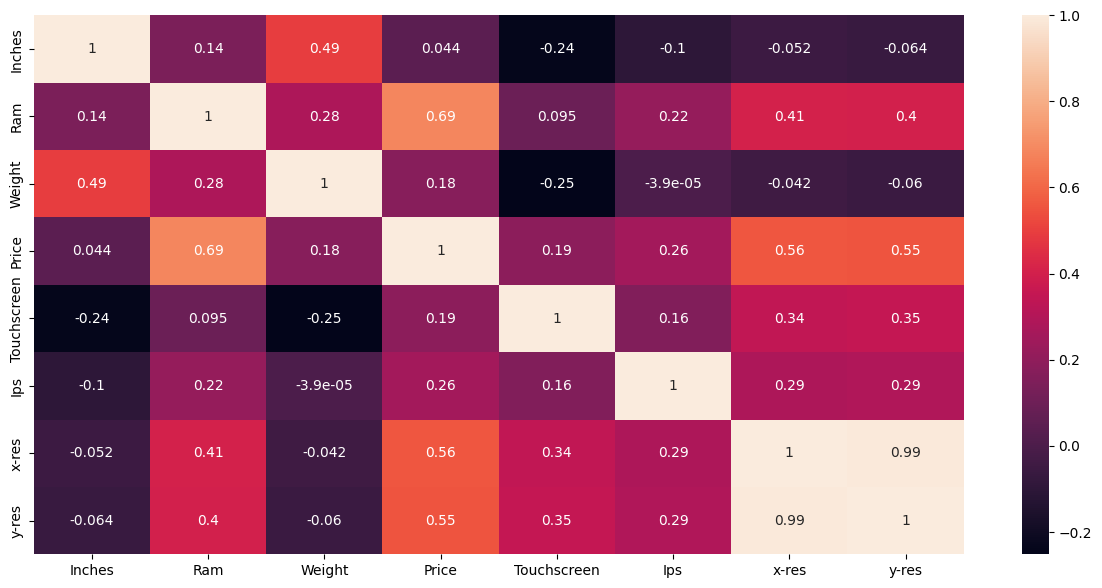

In [144]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True,)
plt.show()

# The formula of PPI is:

$$
    PPI(pixels per inch) = \frac{\sqrt{X_resolution^2+Y_resolution^2}}{inches}
$$

In [145]:
data['ppi']=(data['x-res']**2 +data['y-res']**2)**0.5/data['Inches'].astype('float')

In [146]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,x-res,y-res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983001
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677938
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211995
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534629
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983001


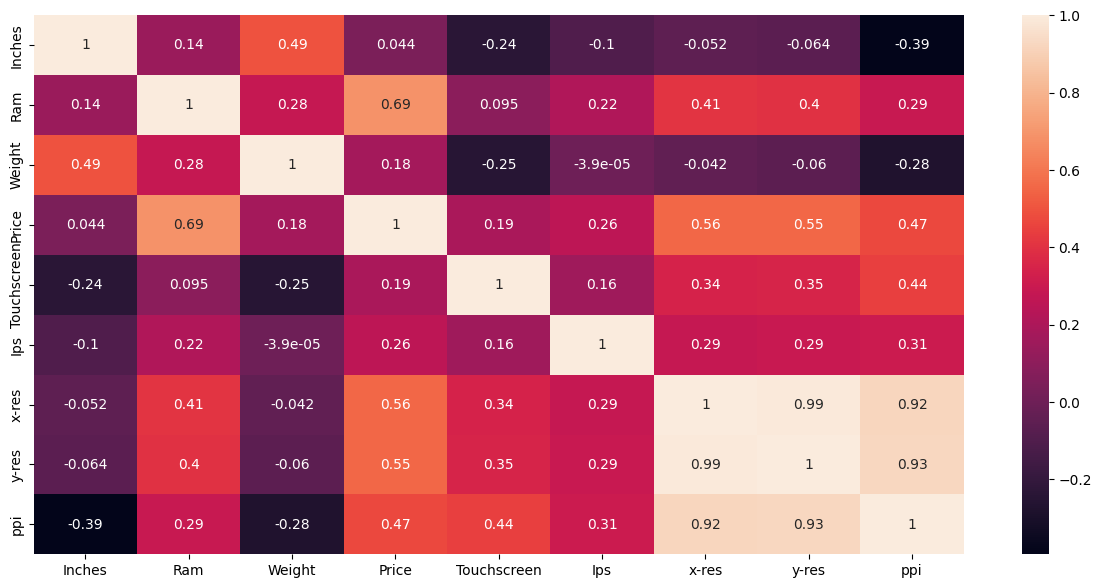

In [147]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True,)
plt.show()

Now we can drop inches and xres and yres columns

In [148]:
data.drop(columns=['ScreenResolution','Inches','x-res','y-res'],inplace=True)
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983001
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534629
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983001


In [149]:
data['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz     213
Intel Core i7 7700HQ 2.8GHz    142
Intel Core i7 7500U 2.7GHz     128
Intel Core i7 8550U 1.8GHz      72
Intel Core i5 8250U 1.6GHz      68
                              ... 
AMD A9-Series 9420 2.9GHz        1
Intel Core i7 2.2GHz             1
AMD A6-Series 7310 2GHz          1
Intel Atom Z8350 1.92GHz         1
AMD E-Series 9000e 1.5GHz        1
Name: Cpu, Length: 118, dtype: int64

Now we can futher work on CPU .
As we see we can group them as intel , AMD and other processors.

For now lets Extract first 3 words from the column data:

In [150]:
data['cpu-name']=data['Cpu'].str.split().str[:3].str.join(sep=" ")
# data['new'] = data.apply(lambda x: x.str.split().str[:3])

data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,cpu-name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983001,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534629,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983001,Intel Core i5


In [151]:
#Grouping them in intel , amd and other process
def newcpuname(s):
  if s=='Intel Core i3' or s== 'Intel Core i5' or s== 'Intel Core i7':
    return s

  elif s.split()[0]=='AMD':
    return 'AMD Processor'

  else:
    return 'Other processors'


data['cpu-name']= data['cpu-name'].apply(lambda s:newcpuname(s))

In [152]:
data['cpu-name'].value_counts()

Intel Core i7       515
Intel Core i5       440
Other processors    152
Intel Core i3       134
AMD Processor        62
Name: cpu-name, dtype: int64

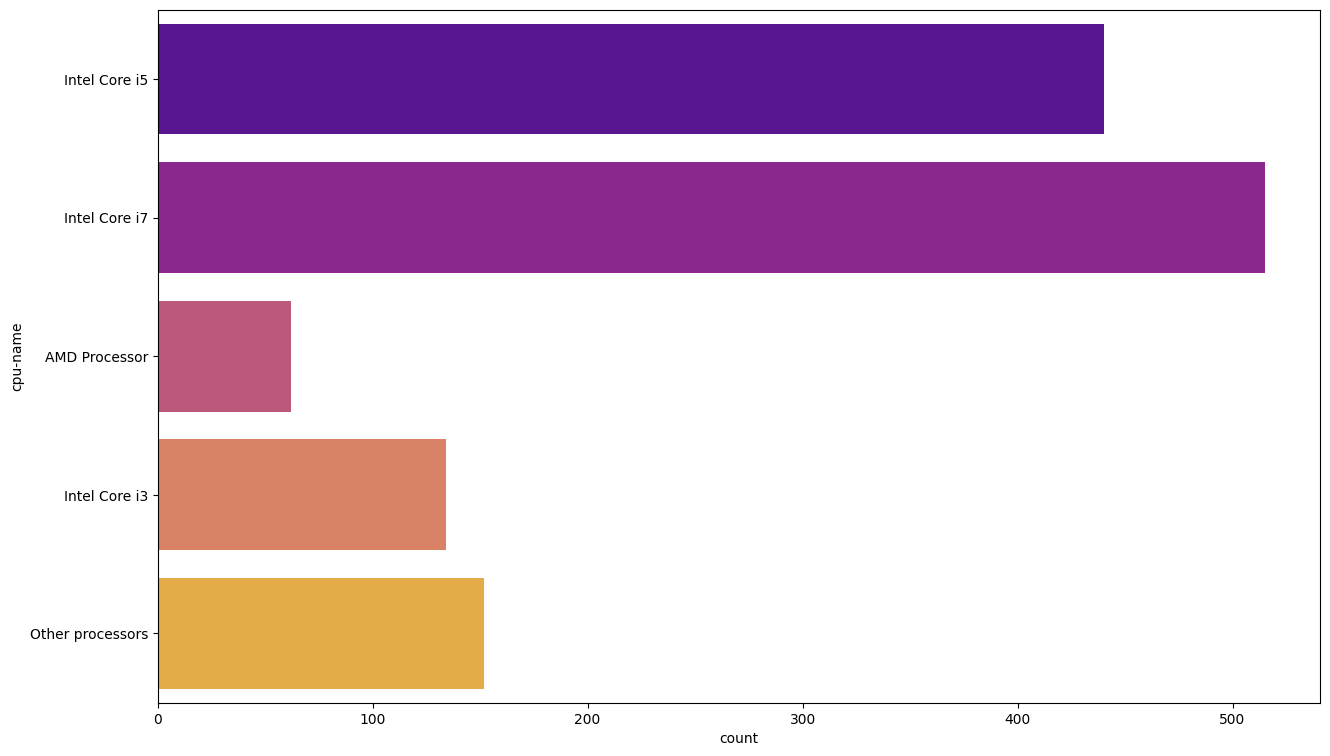

In [153]:
plt.figure(figsize=(15,9))
sns.countplot(data['cpu-name'],palette='plasma')
plt.show()

Intel i7 has highest number in all cpu processors.

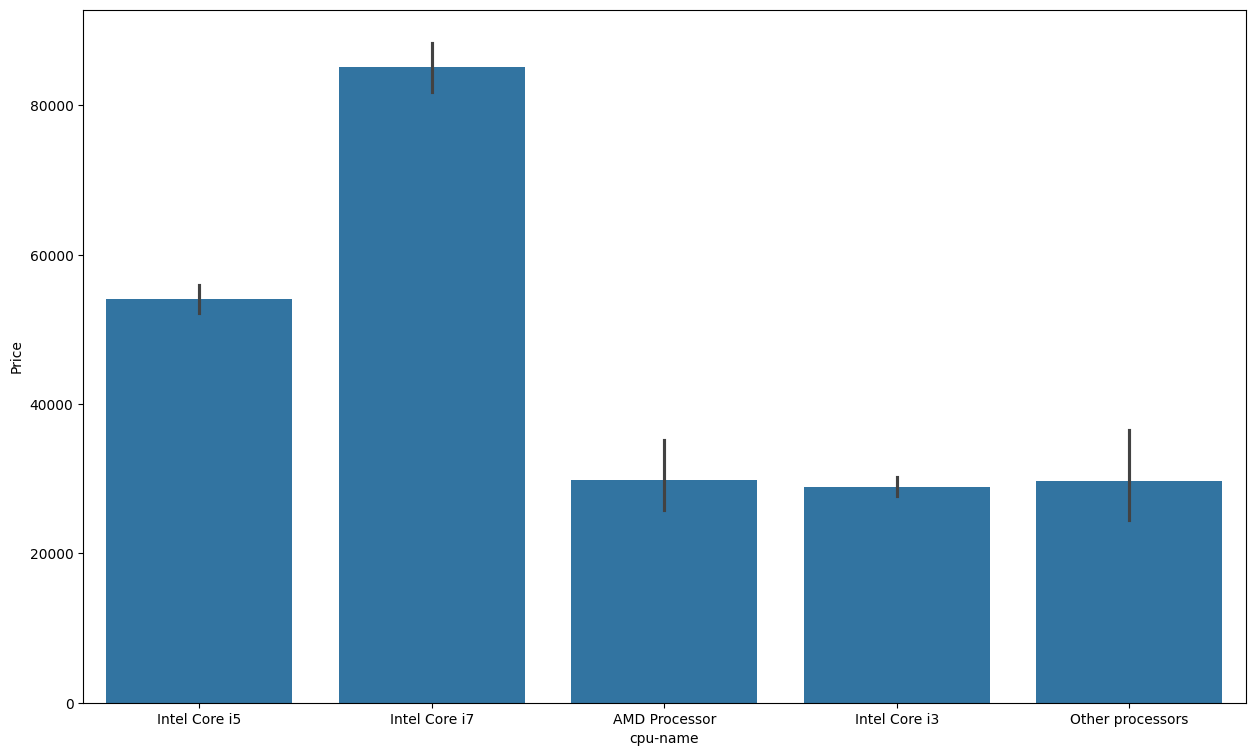

In [154]:
plt.figure(figsize=(15,9))
sns.barplot(x=data['cpu-name'],y=data['Price'])
plt.show()

In [155]:
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,cpu-name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983001,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534629,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983001,Intel Core i5


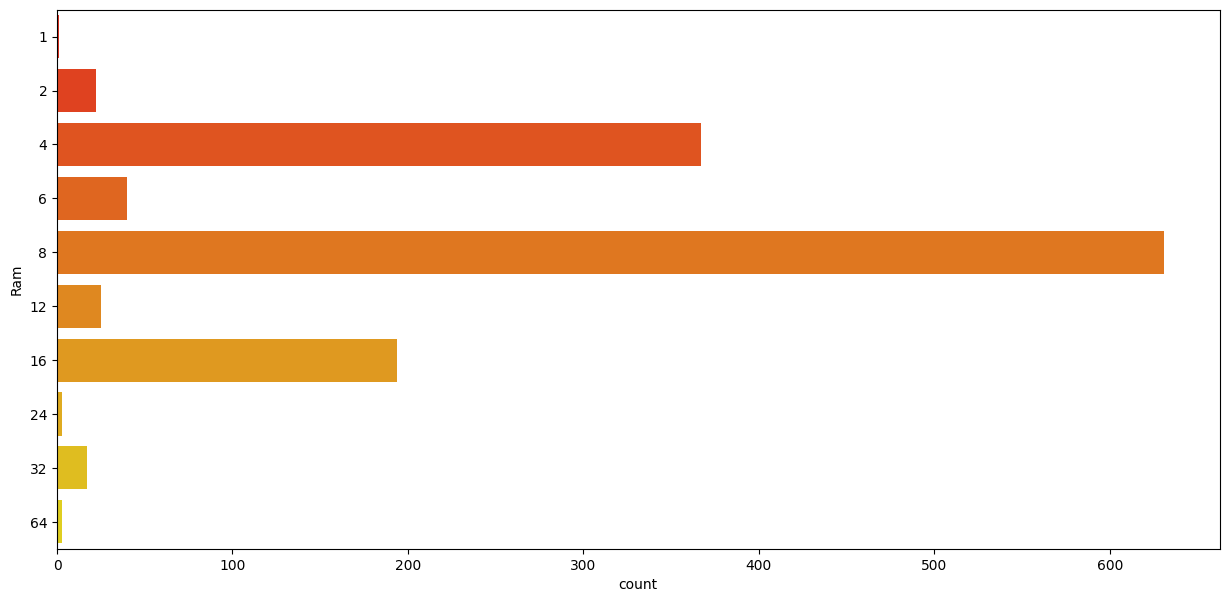

In [156]:
plt.figure(figsize=(15,7))
sns.countplot(y=data['Ram'],palette='autumn')
plt.show()

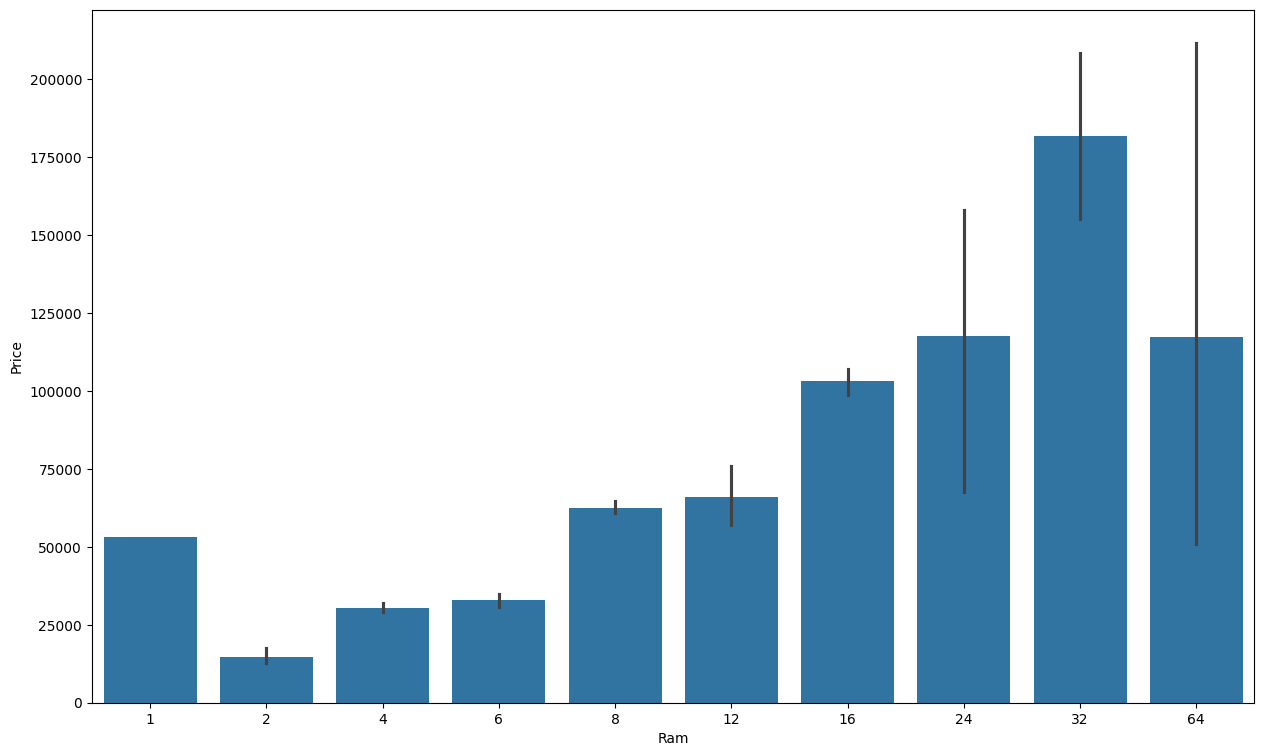

In [157]:
plt.figure(figsize=(15,9))
sns.barplot(x=data['Ram'],y=data['Price'])
plt.show()

32gb ram has highest price and expensive.

In [158]:
data.Memory.value_counts()

256GB SSD                        432
1TB HDD                          217
500GB HDD                        130
512GB SSD                        116
128GB SSD +  1TB HDD              92
128GB SSD                         74
256GB SSD +  1TB HDD              71
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                14
512GB SSD +  1TB HDD              14
1TB SSD                           13
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
128GB Flash Storage                4
180GB SSD                          4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

Now since MEMORY includes both ssd , hdd and flash storage, including some configurations having hdd+ssd type systems.
For this kind of data lets split 3 of those memory storages with 2 layers and see which computer overlaps which memory configuration

First lets remove gb , tb and excess strings.

In [159]:
data['Memory'] = data['Memory'].astype(str).replace('\.0','',regex = True)
data['Memory'] = data['Memory'].str.replace('GB','')
data['Memory'] = data['Memory'].str.replace('TB','000')

In [160]:
data.Memory.value_counts()

256 SSD                         432
1000 HDD                        218
500 HDD                         130
512 SSD                         116
128 SSD +  1000 HDD              92
128 SSD                          74
256 SSD +  1000 HDD              71
32 Flash Storage                 37
2000 HDD                         16
64 Flash Storage                 14
512 SSD +  1000 HDD              14
1000 SSD                         13
256 SSD +  2000 HDD              10
1000 Hybrid                       9
256 Flash Storage                 8
16 Flash Storage                  7
32 SSD                            6
128 Flash Storage                 4
180 SSD                           4
512 SSD +  2000 HDD               3
16 SSD                            3
512 Flash Storage                 2
1000 SSD +  1000 HDD              2
256 SSD +  500 HDD                2
128 SSD +  2000 HDD               2
256 SSD +  256 SSD                2
512 SSD +  256 SSD                1
512 SSD +  512 SSD          

In [161]:
nmt = data['Memory'].str.split('+',n=1,expand=True)
nmt

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [162]:
data['1_column'] = nmt[0]
data['1_column'] = data['1_column'].str.strip()
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,cpu-name,1_column
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983001,Intel Core i5,128 SSD
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5,128 Flash Storage
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5,256 SSD
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534629,Intel Core i7,512 SSD
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983001,Intel Core i5,256 SSD


In [163]:
list1 = ['HDD','SSD','Hybrid','FlashStorage']

for i in list1:
  data['one'+i] = data['1_column'].apply(lambda x:1 if i in x else 0)


data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,cpu-name,1_column,oneHDD,oneSSD,oneHybrid,oneFlashStorage
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983001,Intel Core i5,128 SSD,0,1,0,0
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5,128 Flash Storage,0,0,0,0
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5,256 SSD,0,1,0,0
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534629,Intel Core i7,512 SSD,0,1,0,0
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983001,Intel Core i5,256 SSD,0,1,0,0


In [164]:
data['2_column'] = nmt[1]
data['2_column'] = data['2_column'].str.strip()

data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,cpu-name,1_column,oneHDD,oneSSD,oneHybrid,oneFlashStorage,2_column
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983001,Intel Core i5,128 SSD,0,1,0,0,None
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5,128 Flash Storage,0,0,0,0,None
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5,256 SSD,0,1,0,0,None
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534629,Intel Core i7,512 SSD,0,1,0,0,None
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983001,Intel Core i5,256 SSD,0,1,0,0,None


In [165]:
data['2_column'] = data['2_column'].fillna('0')
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,cpu-name,1_column,oneHDD,oneSSD,oneHybrid,oneFlashStorage,2_column
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983001,Intel Core i5,128 SSD,0,1,0,0,0
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5,128 Flash Storage,0,0,0,0,0
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5,256 SSD,0,1,0,0,0
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534629,Intel Core i7,512 SSD,0,1,0,0,0
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983001,Intel Core i5,256 SSD,0,1,0,0,0


In [166]:
list2 = ['HDD','SSD','Hybrid','FlashStorage']

for i in list2:
  data['two'+i] = data['2_column'].apply(lambda x:1 if i in x else 0)


data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,...,1_column,oneHDD,oneSSD,oneHybrid,oneFlashStorage,2_column,twoHDD,twoSSD,twoHybrid,twoFlashStorage
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,...,128 SSD,0,1,0,0,0,0,0,0,0
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,...,128 Flash Storage,0,0,0,0,0,0,0,0,0
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,...,256 SSD,0,1,0,0,0,0,0,0,0
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,...,512 SSD,0,1,0,0,0,0,0,0,0
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,...,256 SSD,0,1,0,0,0,0,0,0,0


In [167]:
data['2_column'].value_counts()

0              1099
1000 HDD        181
2000 HDD         15
256 SSD           3
500 HDD           2
1000 Hybrid       2
512 SSD           1
Name: 2_column, dtype: int64

In [168]:
data['1_column'] = data['1_column'].str.replace("\D",'')
data['1_column'].value_counts()

256     526
1000    243
128     173
512     138
500     130
32       44
64       16
2000     16
16       10
180       4
240       1
8         1
508       1
Name: 1_column, dtype: int64

In [169]:
data['2_column'] = data['2_column'].str.replace("\D",'')
data['2_column'].value_counts()

0       1099
1000     183
2000      15
256        3
500        2
512        1
Name: 2_column, dtype: int64

In [170]:
data['1_column'] = data['1_column'].astype('int')
data['2_column'] = data['2_column'].astype('int')

In [171]:
data.columns

Index(['Company', 'TypeName', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price', 'Touchscreen', 'Ips', 'ppi', 'cpu-name', '1_column', 'oneHDD',
       'oneSSD', 'oneHybrid', 'oneFlashStorage', '2_column', 'twoHDD',
       'twoSSD', 'twoHybrid', 'twoFlashStorage'],
      dtype='object')

In [172]:
data['HDD'] = (data['1_column']*data['oneHDD']+data['2_column']*data['twoHDD'])
data['SSD'] = (data['1_column']*data['oneSSD']+data['2_column']*data['twoSSD'])
data['Hybrid'] = (data['1_column']*data['oneHybrid']+data['2_column']*data['twoHybrid'])
data['FlashStorage'] = (data['1_column']*data['oneFlashStorage']+data['2_column']*data['twoFlashStorage'])

In [173]:
data.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,...,oneFlashStorage,2_column,twoHDD,twoSSD,twoHybrid,twoFlashStorage,HDD,SSD,Hybrid,FlashStorage
995,Asus,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,Windows 10,1.400,61272.0000,0,...,0,0,0,0,0,0,0,256,0,0
110,Asus,Ultrabook,Intel Core i7 8550U 1.8GHz,16,256 SSD + 1000 HDD,Nvidia GeForce MX150,Windows 10,1.500,67239.3600,0,...,0,1000,1,0,0,0,1000,256,0,0
640,Lenovo,Gaming,Intel Core i7 7700HQ 2.8GHz,8,128 SSD + 1000 HDD,Nvidia GeForce GTX 1050M,Windows 10,2.500,59087.5200,0,...,0,1000,1,0,0,0,1000,128,0,0
104,Microsoft,Ultrabook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,Windows 10 S,1.252,71395.2000,1,...,0,0,0,0,0,0,0,256,0,0
1223,Dell,Ultrabook,Intel Core i5 6300U 2.4GHz,8,256 SSD,Intel HD Graphics 520,Windows 7,1.260,91288.3536,1,...,0,0,0,0,0,0,0,256,0,0


In [174]:
data.drop(columns=['Memory','1_column', 'oneHDD',
       'oneSSD', 'oneHybrid', 'oneFlashStorage', '2_column', 'twoHDD',
       'twoSSD', 'twoHybrid', 'twoFlashStorage'],inplace=True)

In [175]:
data.head()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,cpu-name,HDD,SSD,Hybrid,FlashStorage
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983001,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5,0,0,0,0
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534629,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983001,Intel Core i5,0,256,0,0


In [176]:
data.corr()['Price']

Ram             0.685649
Weight          0.175103
Price           1.000000
Touchscreen     0.190509
Ips             0.256578
ppi             0.468866
HDD            -0.090815
SSD             0.665354
Hybrid          0.008302
FlashStorage         NaN
Name: Price, dtype: float64

In [177]:
data['Gpu'].value_counts()

Intel HD Graphics 620      301
Intel HD Graphics 520      181
Intel UHD Graphics 620      66
Nvidia GeForce GTX 1050     64
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [178]:
data['Gpu'] = data['Gpu'].apply(lambda x:x.split()[0])
data.head()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,cpu-name,HDD,SSD,Hybrid,FlashStorage
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,Intel,macOS,1.37,71378.6832,0,1,226.983001,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,Intel,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5,0,0,0,0
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,Intel,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,AMD,macOS,1.83,135195.3360,0,1,220.534629,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,Intel,macOS,1.37,96095.8080,0,1,226.983001,Intel Core i5,0,256,0,0


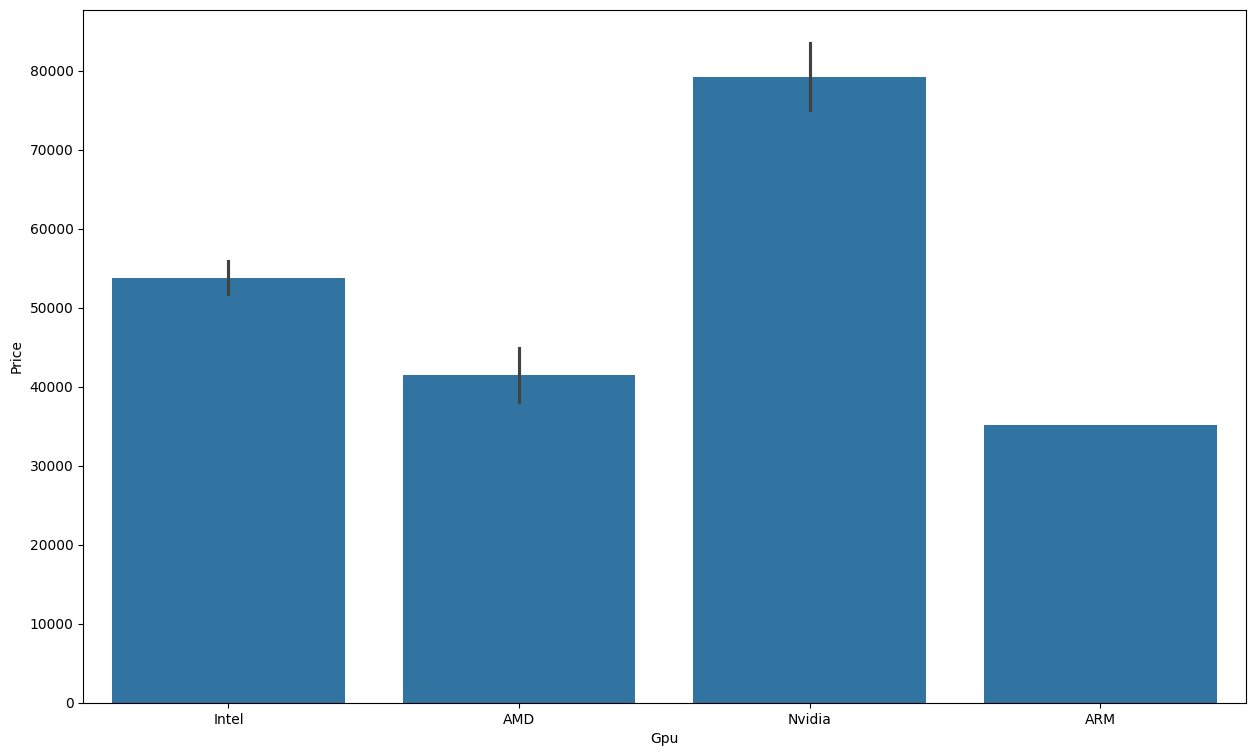

In [179]:
plt.figure(figsize=(15,9))
sns.barplot(x=data['Gpu'],y=data['Price'])
plt.show()

In [180]:
data['OpSys'].value_counts()

Windows 10      1077
No OS             63
Linux             61
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            1
Name: OpSys, dtype: int64

In [181]:
def sys(c):
  if c.split()[0]=='Windows':
    return 'Windows'
  elif c.split()[0]=='macOS' or c.split()[0]=='Mac':
    return 'MacOS'
  else:
    return 'Other OS'
data['OpSys'] = data['OpSys'].apply(lambda c:sys(c))
data.sample(5)

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,cpu-name,HDD,SSD,Hybrid,FlashStorage
344,Dell,Ultrabook,Intel Core i7 8550U 1.8GHz,8,Intel,Windows,1.20,84129.12,0,0,165.632116,Intel Core i7,0,256,0,0
442,Lenovo,Ultrabook,Intel Core i5 7200U 2.5GHz,8,Intel,Windows,1.36,76137.12,0,1,176.232574,Intel Core i5,0,256,0,0
495,Lenovo,Ultrabook,Intel Core i5 6200U 2.3GHz,8,Intel,Windows,1.30,58554.72,0,1,125.367428,Intel Core i5,0,180,0,0
291,Asus,Gaming,Intel Core i7 7700HQ 2.8GHz,8,Nvidia,Windows,3.00,63243.36,0,0,127.335680,Intel Core i7,1000,0,0,0
531,Toshiba,Notebook,Intel Core i5 7200U 2.5GHz,8,Intel,Windows,2.00,45820.80,0,1,141.211995,Intel Core i5,500,0,0,0


In [182]:
data['OpSys'].value_counts()

Windows     1130
Other OS     152
MacOS         21
Name: OpSys, dtype: int64

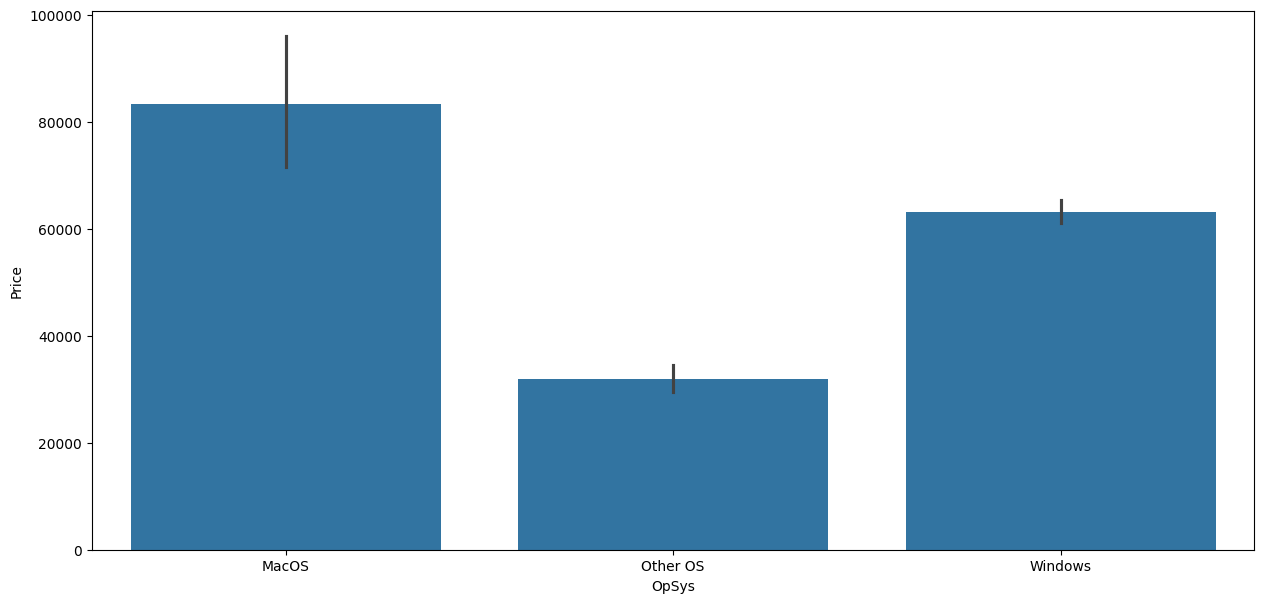

In [183]:
plt.figure(figsize=(15,7))
sns.barplot(x = data['OpSys'],y = data['Price'])
plt.show()

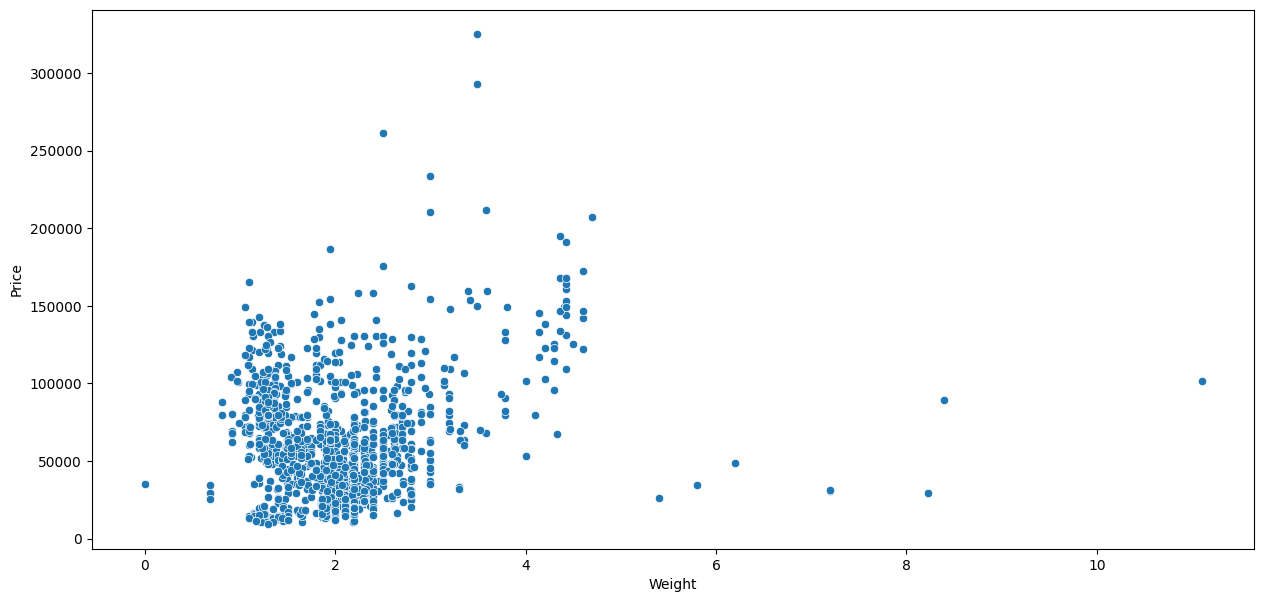

In [184]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=data['Weight'],y=data['Price'])
plt.show()

In [185]:
data.corr()['Price']

Ram             0.685649
Weight          0.175103
Price           1.000000
Touchscreen     0.190509
Ips             0.256578
ppi             0.468866
HDD            -0.090815
SSD             0.665354
Hybrid          0.008302
FlashStorage         NaN
Name: Price, dtype: float64

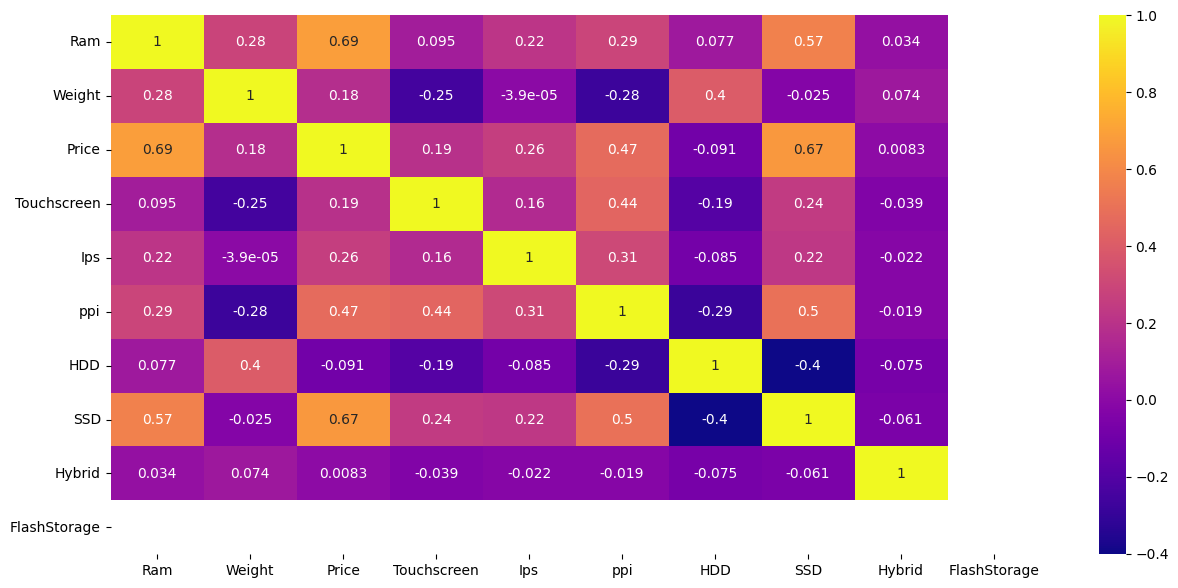

In [186]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True,cmap='plasma')
plt.show()

In [187]:
data.drop(columns=['Hybrid', 'FlashStorage'],inplace=True)

In [188]:
data.columns

Index(['Company', 'TypeName', 'Cpu', 'Ram', 'Gpu', 'OpSys', 'Weight', 'Price',
       'Touchscreen', 'Ips', 'ppi', 'cpu-name', 'HDD', 'SSD'],
      dtype='object')

<Axes: xlabel='Price', ylabel='Count'>

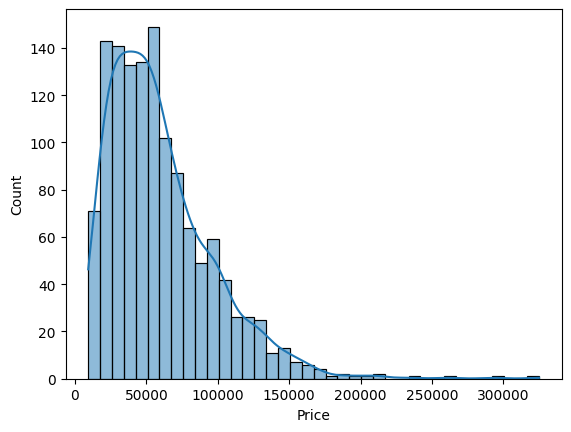

In [189]:
sns.histplot(data['Price'],kde=True)

In [190]:
data['cpu-name'].value_counts()
data.drop(columns='Cpu',inplace=True)


In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Ram          1303 non-null   int32  
 3   Gpu          1303 non-null   object 
 4   OpSys        1303 non-null   object 
 5   Weight       1303 non-null   float32
 6   Price        1303 non-null   float64
 7   Touchscreen  1303 non-null   int64  
 8   Ips          1303 non-null   int64  
 9   ppi          1303 non-null   float64
 10  cpu-name     1303 non-null   object 
 11  HDD          1303 non-null   int64  
 12  SSD          1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(5)
memory usage: 122.3+ KB


In [192]:
data1 = data.copy()
data1.drop(columns='Cpu',inplace=True)

Encoding the columns using Label encoder to have few columns.

In [193]:
from sklearn.preprocessing import LabelEncoder
columns=['Company', 'TypeName','Gpu', 'OpSys', 'cpu-name']
le = LabelEncoder()
for i in columns:
  data1[i]  = le.fit_transform(data1[i])
data1.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,cpu-name,HDD,SSD
0,1,4,8,2,0,1.37,71378.6832,0,1,226.983001,2,0,128
1,1,4,8,2,0,1.34,47895.5232,0,0,127.677938,2,0,0
2,7,3,8,2,1,1.86,30636.0000,0,0,141.211995,2,0,256
3,1,4,16,0,0,1.83,135195.3360,0,1,220.534629,3,0,512
4,1,4,8,2,0,1.37,96095.8080,0,1,226.983001,2,0,256


In [194]:
data1.Company.value_counts()

10    320
4     287
7     266
2     156
0     103
11     53
16     47
1      21
15      9
14      7
12      7
13      6
18      4
17      4
3       3
6       3
9       3
8       2
5       2
Name: Company, dtype: int64

In [195]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   int64  
 1   TypeName     1303 non-null   int64  
 2   Ram          1303 non-null   int32  
 3   Gpu          1303 non-null   int64  
 4   OpSys        1303 non-null   int64  
 5   Weight       1303 non-null   float32
 6   Price        1303 non-null   float64
 7   Touchscreen  1303 non-null   int64  
 8   Ips          1303 non-null   int64  
 9   ppi          1303 non-null   float64
 10  cpu-name     1303 non-null   int64  
 11  HDD          1303 non-null   int64  
 12  SSD          1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(9)
memory usage: 122.3 KB


Since we saw Price having right skewed distribution , we need to log transform it to Normal Distribution so that it dosn't effect other features.

In [197]:
X = data1.drop(['Price'],axis = 1)
y= np.log(data1['Price'])


In [198]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Linear Regression Model
******************************************
******************************************
Train data:

MAE VALUE: 0.306211466340716
R2 SCORE: 0.6113172508009714
Undoing log transform MAE VALUE: 1.358269504462291

------------------------------------------------
Test data:

MAE VALUE: 0.2902056228318572
R2 SCORE: 0.6285160741719802
Undoing log transform MAE VALUE: 1.3367023162846459


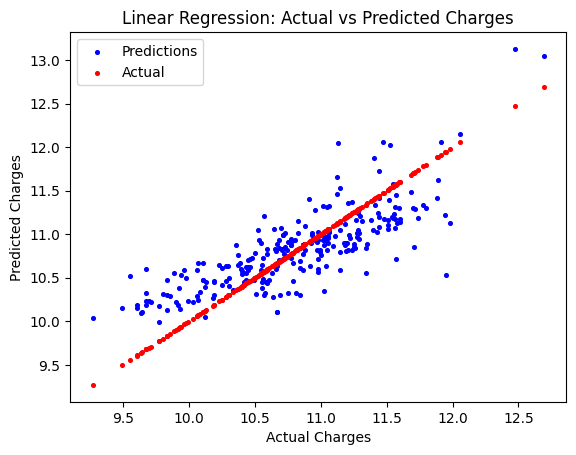

In [200]:
linear = LinearRegression()
linear.fit(X_train,y_train)
y_pred_train = linear.predict(X_train)
y_pred_test = linear.predict(X_test)

#Performace of Train set
mae_train = mean_absolute_error(y_train,y_pred_train)
r2_train = r2_score(y_train,y_pred_train)
print("Linear Regression Model")
print("******************************************")
print("******************************************")
print("Train data:")
print("")
print("MAE VALUE:",mae_train)
print("R2 SCORE:",r2_train)
print("Undoing log transform MAE VALUE:",np.exp(mae_train))

print("")
print("------------------------------------------------")

#Performace of Test set
mae_test = mean_absolute_error(y_test,y_pred_test)
r2_test = r2_score(y_test,y_pred_test)
print("Test data:")
print("")
print("MAE VALUE:",mae_test)
print("R2 SCORE:",r2_test)
print("Undoing log transform MAE VALUE:",np.exp(mae_test))


# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_test, color='blue', label='Predictions', s=7)
plt.scatter(y_test, y_test, color='red', label='Actual',s=7)

plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Linear Regression: Actual vs Predicted Charges')
plt.legend()
plt.show()



Random forest Model
******************************************
******************************************
Train data:

MAE VALUE: 0.06376889138519015
R2 SCORE: 0.9804884073924682
Undoing log transform MAE VALUE: 1.0658460440924078

------------------------------------------------
Test data:

MAE VALUE: 0.1638810000400925
R2 SCORE: 0.8531004884119375
Undoing log transform MAE VALUE: 1.1780741159784736


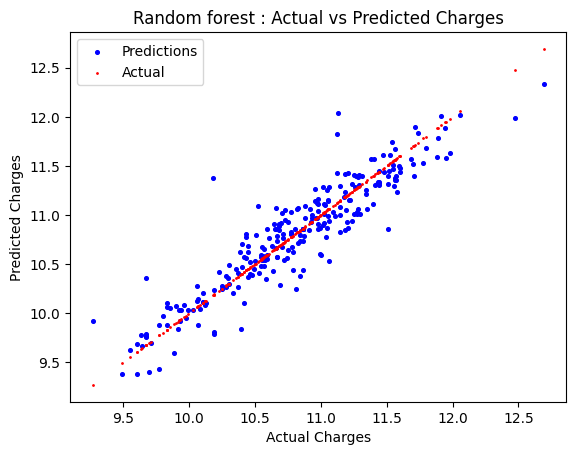

In [201]:
random = RandomForestRegressor()
random.fit(X_train,y_train)
y_pred_train1 = random.predict(X_train)
y_pred_test1 = random.predict(X_test)

#Performace of Train set
mae_train1 = mean_absolute_error(y_train,y_pred_train1)
r2_train1 = r2_score(y_train,y_pred_train1)
print("Random forest Model")
print("******************************************")
print("******************************************")
print("Train data:")
print("")
print("MAE VALUE:",mae_train1)
print("R2 SCORE:",r2_train1)
print("Undoing log transform MAE VALUE:",np.exp(mae_train1))

print("")
print("------------------------------------------------")

#Performace of Test set
mae_test1 = mean_absolute_error(y_test,y_pred_test1)
r2_test1 = r2_score(y_test,y_pred_test1)
print("Test data:")
print("")
print("MAE VALUE:",mae_test1)
print("R2 SCORE:",r2_test1)
print("Undoing log transform MAE VALUE:",np.exp(mae_test1))


# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_test1, color='blue', label='Predictions', s=7)
plt.scatter(y_test,y_test, color='red', label='Actual',s=1)

plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Random forest : Actual vs Predicted Charges')
plt.legend()
plt.show()




XGBOOST Model
******************************************
******************************************
Train data:

MAE VALUE: 0.04168556462090629
R2 SCORE: 0.9900109736177589
Undoing log transform MAE VALUE: 1.0425666073798632

------------------------------------------------
Test data:

MAE VALUE: 0.14606151941101106
R2 SCORE: 0.8746201753737062
Undoing log transform MAE VALUE: 1.1572673802685385


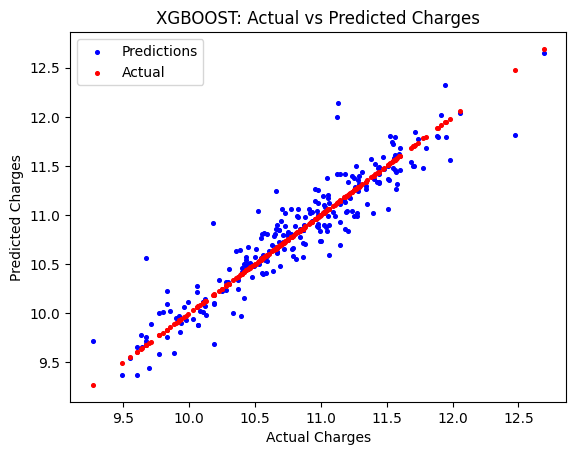

In [202]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
y_pred_train2 = xgb.predict(X_train)
y_pred_test2 = xgb.predict(X_test)

#Performace of Train set
mae_train2 = mean_absolute_error(y_train,y_pred_train2)
r2_train2 = r2_score(y_train,y_pred_train2)
print("XGBOOST Model")
print("******************************************")
print("******************************************")
print("Train data:")
print("")
print("MAE VALUE:",mae_train2)
print("R2 SCORE:",r2_train2)
print("Undoing log transform MAE VALUE:",np.exp(mae_train2))

print("")
print("------------------------------------------------")

#Performace of Test set
mae_test2 = mean_absolute_error(y_test,y_pred_test2)
r2_test2 = r2_score(y_test,y_pred_test2)
print("Test data:")
print("")
print("MAE VALUE:",mae_test2)
print("R2 SCORE:",r2_test2)
print("Undoing log transform MAE VALUE:",np.exp(mae_test2))

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_test2, color='blue', label='Predictions', s=7)
plt.scatter(y_test, y_test, color='red', label='Actual',s=7)

plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('XGBOOST: Actual vs Predicted Charges')
plt.legend()
plt.show()

SVR Model
******************************************
******************************************
Train data:

MAE VALUE: 0.2967455891889098
R2 SCORE: 0.6136907170369412
Undoing log transform MAE VALUE: 1.345472953036348

------------------------------------------------
Test data:

MAE VALUE: 0.2828667775328363
R2 SCORE: 0.6145620469705855
Undoing log transform MAE VALUE: 1.3269283733696722


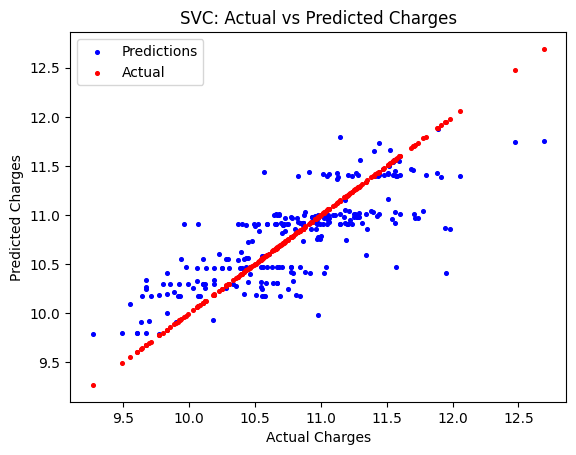

In [203]:
svr = SVR()
svr.fit(X_train,y_train)
y_pred_train3 = svr.predict(X_train)
y_pred_test3 = svr.predict(X_test)

#Performace of Train set
mae_train3 = mean_absolute_error(y_train,y_pred_train3)
r2_train3 = r2_score(y_train,y_pred_train3)
print("SVR Model")
print("******************************************")
print("******************************************")
print("Train data:")
print("")
print("MAE VALUE:",mae_train3)
print("R2 SCORE:",r2_train3)
print("Undoing log transform MAE VALUE:",np.exp(mae_train3))

print("")
print("------------------------------------------------")

#Performace of Test set
mae_test3 = mean_absolute_error(y_test,y_pred_test3)
r2_test3 = r2_score(y_test,y_pred_test3)
print("Test data:")
print("")
print("MAE VALUE:",mae_test3)
print("R2 SCORE:",r2_test3)
print("Undoing log transform MAE VALUE:",np.exp(mae_test3))


# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_test3, color='blue', label='Predictions', s=7)
plt.scatter(y_test, y_test, color='red', label='Actual',s=7)

plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('SVC: Actual vs Predicted Charges')
plt.legend()
plt.show()

KNN Model
******************************************
******************************************
Train data:

MAE VALUE: 0.18169587654079503
R2 SCORE: 0.8424111696671936
Undoing log transform MAE VALUE: 1.1992494185326958

------------------------------------------------
Test data:

MAE VALUE: 0.21612401300911963
R2 SCORE: 0.7646233214336869
Undoing log transform MAE VALUE: 1.2412563013853088


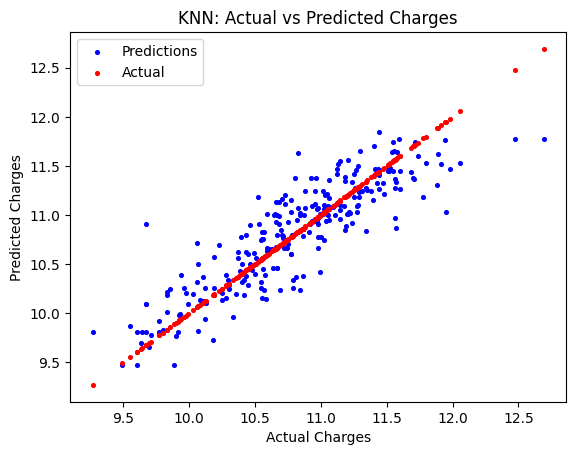

In [204]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
y_pred_train4 = knn.predict(X_train)
y_pred_test4 = knn.predict(X_test)

#Performace of Train set
mae_train4 = mean_absolute_error(y_train,y_pred_train4)
r2_train4 = r2_score(y_train,y_pred_train4)
print("KNN Model")
print("******************************************")
print("******************************************")
print("Train data:")
print("")
print("MAE VALUE:",mae_train4)
print("R2 SCORE:",r2_train4)
print("Undoing log transform MAE VALUE:",np.exp(mae_train4))

print("")
print("------------------------------------------------")

#Performace of Test set
mae_test4 = mean_absolute_error(y_test,y_pred_test4)
r2_test4 = r2_score(y_test,y_pred_test4)
print("Test data:")
print("")
print("MAE VALUE:",mae_test4)
print("R2 SCORE:",r2_test4)
print("Undoing log transform MAE VALUE:",np.exp(mae_test4))


# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_test4, color='blue', label='Predictions', s=7)
plt.scatter(y_test, y_test, color='red', label='Actual',s=7)

plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('KNN: Actual vs Predicted Charges')
plt.legend()
plt.show()

In [205]:
evaluation = {'Linear Regression':{'MAE':(np.exp(mae_test)),'R2 score':(r2_test)},
              'Random forest':{'MAE':(np.exp(mae_test1)),'R2 score':r2_test1},
              'XGBOOST':{'MAE':(np.exp(mae_test2)),'R2 score':(r2_test2)},
              'SVC':{'MAE':(np.exp(mae_test3)),'R2 score':(r2_test3)},
              'KNN':{'MAE':(np.exp(mae_test4)),'R2 score':(r2_test4)}
              }
eval_data=pd.DataFrame(evaluation)
eval_data.head()

,Linear Regression,Random forest,XGBOOST,SVC,KNN
MAE,1.336702,1.178074,1.157267,1.326928,1.241256
R2 score,0.628516,0.853100,0.874620,0.614562,0.764623


Lets do hyperparameter Tuning to futher see if data is overfitting.

In [206]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
rf = RandomForestRegressor(random_state = 42)
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error',
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train,y_train);

In [ ]:
rf_random.best_params_

Test data:

MAE VALUE: 0.1612416427088622
R2 SCORE: 0.8559887146950861
Undoing log transform MAE VALUE: 1.1749688571701897


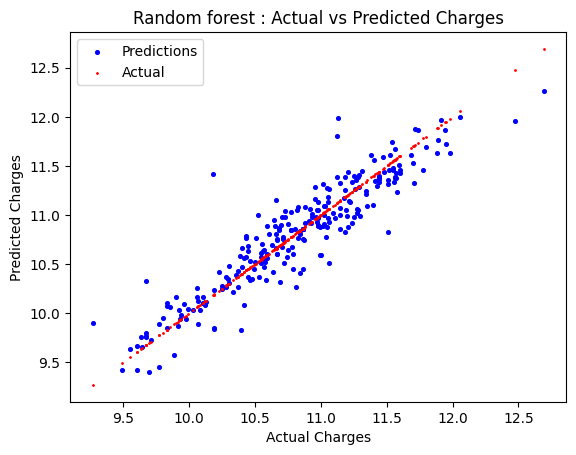

In [207]:
random1 = RandomForestRegressor(n_estimators= 400,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features= 'sqrt',
 max_depth= None,
 bootstrap= False)
random.fit(X_train,y_train)
y_pred_train5 = random.predict(X_train)
y_pred_test5 = random.predict(X_test)



#Performace of Test set
mae_test5 = mean_absolute_error(y_test,y_pred_test5)
r2_test5 = r2_score(y_test,y_pred_test5)
print("Test data:")
print("")
print("MAE VALUE:",mae_test5)
print("R2 SCORE:",r2_test5)
print("Undoing log transform MAE VALUE:",np.exp(mae_test5))


# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_test5, color='blue', label='Predictions', s=7)
plt.scatter(y_test,y_test, color='red', label='Actual',s=1)

plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Random forest : Actual vs Predicted Charges')
plt.legend()
plt.show()

In [208]:
randomf = {'Before Hyperparameter Training':{'MAE':np.exp(mae_test1),'R2score':r2_test1},'After Hyperparameter training':{'MAE':np.exp(mae_test5),'R2score':r2_test5}}

Final = pd.DataFrame(randomf)
Final

,Before Hyperparameter Training,After Hyperparameter training
MAE,1.178074,1.174969
R2score,0.853100,0.855989


Not much difference.

For backend. Streamlit version.

In [ ]:
X1 = data.drop(['Price'],axis = 1)
y1= np.log(data['Price'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X1, y1, test_size = 0.3, random_state = 42)

In [ ]:
mapper = {i:value for i,value in enumerate(Xtrain.columns)}
mapper

In [ ]:
step1 = ColumnTransformer(transformers=[

('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown = 'ignore'),[0,1,3,4,9])

],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,

random_state=3,

max_samples=0.5,

max_features=0.75,

max_depth=15)

pipe = Pipeline([

('step1',step1),

('step2',step2)

])

pipe.fit(Xtrain,ytrain)

y_pred54 = pipe.predict(Xtest)

print('R2 score',r2_score(ytest,y_pred54))

print('MAE',mean_absolute_error(ytest,y_pred54))

In [210]:
import pickle
pickle.dump(data,open('data1.pkl','wb'))
pickle.dump(random,open('random.pkl','wb'))


## Questions to Explore:

1)  **Which features have the most significant impact on laptop prices?**

 Ram , SSD and PPI Had the most significant impact on laptop prices

2) **Can the model accurately predict the prices of laptops from lesser-known brands?**

Not all the time. If the other specifications like cpu , ram , gpu etc are in popular categories. It will predict accurately.

3) **Does the brand of the laptop significantly influence its price?**

Only applies to apple. But for remaining it depends on the configurations.

4) **How well does the model perform on laptops with high-end specifications compared to budget laptops?**


Model dosen't differntiate and performs resonably well on both ends of specifications.

5) **What are the limitations and challenges in predicting laptop prices accurately?**

Major Limitation is lack of sufficient data of most laptop companies which will adversely effect in predicting certain brands , configurations etc